### Total phase variance for Kolmogorov spectrum

We compute the Kolmogorov spectrum total variance over a 10m telescope and we compare it with Noll('76) formula ($\Delta_{1}$ = 1.029 ($\frac{D}{r0})^{5/3}$).

In [1]:
import numpy as np
from scipy.special import jv
from arte.atmo.von_karman_psd import VonKarmanPsd

'Compute the total variance of Kolmogorov over a 10m telescope:'
R = 5
r0 = 0.1
L0 = np.inf
freqs = np.logspace(-8, 4, 1000)
bess = jv(1, 2*np.pi*R*freqs)

psd = VonKarmanPsd(r0, L0)
psd_piston_removed = psd.spatial_psd(freqs) * (1 - (bess/(np.pi*R*freqs))**2)
var_in_square_rad = np.trapz(psd_piston_removed*2*np.pi*freqs, freqs)

noll_var_in_square_rad = 1.029*(2*R/r0)**(5./3)

print("Variance computed using the VonKarmanPsd class: %d" %(var_in_square_rad))
print("Variance from Noll's formula: %d" %(noll_var_in_square_rad))

Variance computed using the VonKarmanPsd class: 2213
Variance from Noll's formula: 2216


### Kolmogorov and Von Karman spectra

Plot spectra for different outer scale values

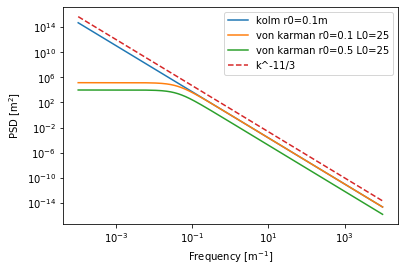

In [16]:
import matplotlib.pyplot as plt
r0 = np.array([0.1, 0.5])
L0 = [25, 25]
psd_kolm = VonKarmanPsd(0.1, np.inf)
psd_vk = VonKarmanPsd(r0, L0)
spatial_freqs = np.logspace(-4, 4, 1000)
psd_kolm.plot_von_karman_psd_vs_frequency(spatial_freqs)
psd_vk.plot_von_karman_psd_vs_frequency(spatial_freqs, idx=0)
psd_vk.plot_von_karman_psd_vs_frequency(spatial_freqs, idx=1)
plt.plot(spatial_freqs, 10*spatial_freqs**(-11/3), '--')
plt.legend(['kolm r0=0.1m', 'von karman r0=0.1 L0=25', 'von karman r0=0.5 L0=25', 'k^-11/3'])
